<a href="https://colab.research.google.com/github/mehrnazeraeisi/Body_Fat/blob/main/Bodyfat_knnregression_modification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#[1]
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import train_test_split


In [2]:
# Function to prioritize features based on KNN R² score
def features_prioritization(X, y, features):
    features_scores = []
    knn_reg = KNeighborsRegressor()

    for feature in features:
        X_feature = X[[feature]]  # Ensure 2D
        knn_reg.fit(X_feature, y)
        y_pred = knn_reg.predict(X_feature)
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        features_scores.append((feature, r2, mse))  # اضافه شد

    df_scores = pd.DataFrame(features_scores, columns=['Feature', 'R2_Score', 'MSE']).sort_values(by='R2_Score', ascending=False)
    return df_scores


In [3]:
# بارگذاری فایل
data = pd.read_csv('bodyfat.csv')

print(data.columns)
# نمایش اطلاعات
print(data.head())
data.shape


Index(['Pct.BF', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen',
       'Waist', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Bicep', 'Forearm', 'Wrist'],
      dtype='object')
   Pct.BF  Age  Weight  Height  Neck  Chest  Abdomen      Waist    Hip  Thigh  \
0    12.3   23  154.25   67.75  36.2   93.1     85.2  33.543307   94.5   59.0   
1     6.1   22  173.25   72.25  38.5   93.6     83.0  32.677165   98.7   58.7   
2    25.3   22  154.00   66.25  34.0   95.8     87.9  34.606299   99.2   59.6   
3    10.4   26  184.75   72.25  37.4  101.8     86.4  34.015748  101.2   60.1   
4    28.7   24  184.25   71.25  34.4   97.3    100.0  39.370079  101.9   63.2   

   Knee  Ankle  Bicep  Forearm  Wrist  
0  37.3   21.9   32.0     27.4   17.1  
1  37.3   23.4   30.5     28.9   18.2  
2  38.9   24.0   28.8     25.2   16.6  
3  37.3   22.8   32.4     29.4   18.2  
4  42.2   24.0   32.2     27.7   17.7  


(250, 15)

In [5]:
import pandas as pd

# اطلاعات ویژگی‌ها
columns_info = {
    'Pct.BF': ['درصد چربی بدن', 'هدف اصلی مدل؛ مقدار درصد چربی بدن فرد'],
    'Age': ['سن', 'سن فرد (به سال)'],
    'Weight': ['وزن', 'وزن بدن به پوند (lbs)'],
    'Height': ['قد', 'قد فرد به اینچ (inch)'],
    'Neck': ['دور گردن', 'محیط دور گردن به سانتی‌متر'],
    'Chest': ['دور سینه', 'محیط دور سینه (سانتی‌متر)'],
    'Abdomen': ['دور شکم', 'محیط دور شکم در سطح ناف (سانتی‌متر)'],
    'Waist': ['دور کمر', 'محیط کمر (سانتی‌متر)'],
    'Hip': ['دور باسن', 'محیط باسن (سانتی‌متر)'],
    'Thigh': ['دور ران', 'محیط ران (سانتی‌متر)'],
    'Knee': ['دور زانو', 'محیط دور زانو (سانتی‌متر)'],
    'Ankle': ['دور مچ پا', 'محیط دور مچ پا (سانتی‌متر)'],
    'Bicep': ['دور بازو', 'محیط دور بازوی بدون انقباض (سانتی‌متر)'],
    'Forearm': ['دور ساعد', 'محیط ساعد (سانتی‌متر)'],
    'Wrist': ['دور مچ دست', 'محیط دور مچ دست (سانتی‌متر)']
}

# ساخت جدول فارسی مرتب
df_description = pd.DataFrame([
    {'🆔 نام ستون': key, '📌 معنی': val[0], '📝 توضیح': val[1]} for key, val in columns_info.items()
])

# نمایش جدول (اگر در Jupyter یا Colab هستی بدون print)
df_description


,🆔 نام ستون,📌 معنی,📝 توضیح
0,Pct.BF,درصد چربی بدن,هدف اصلی مدل؛ مقدار درصد چربی بدن فرد
1,Age,سن,سن فرد (به سال)
2,Weight,وزن,وزن بدن به پوند (lbs)
3,Height,قد,قد فرد به اینچ (inch)
4,Neck,دور گردن,محیط دور گردن به سانتی‌متر
5,Chest,دور سینه,محیط دور سینه (سانتی‌متر)
6,Abdomen,دور شکم,محیط دور شکم در سطح ناف (سانتی‌متر)
7,Waist,دور کمر,محیط کمر (سانتی‌متر)
8,Hip,دور باسن,محیط باسن (سانتی‌متر)
9,Thigh,دور ران,محیط ران (سانتی‌متر)


In [6]:

# جدا کردن ویژگی‌ها و برچسب‌ها
X_data = data.drop('Pct.BF', axis=1)  # همه ستون‌ها به جز 'target'
y_data = data['Pct.BF']              # فقط ستون 'target'
data_features = X_data.columns       # نام ویژگی‌ها




In [14]:
# Run feature prioritization for the iris dataset
data_scores = features_prioritization(X_data, y_data, data_features)
print("🔎 Feature Group Performance Summary (Bodyfat dataset):")
print(data_scores)  # Categorize features by R² score

🔎 Feature Group Performance Summary (Bodyfat dataset):
    Feature  R2_Score        MSE
5   Abdomen  0.737504  17.984960
6     Waist  0.734626  18.182168
4     Chest  0.596521  27.644470
7       Hip  0.559713  30.166402
1    Weight  0.492824  34.749306
8     Thigh  0.446252  37.940210
9      Knee  0.388234  41.915322
11    Bicep  0.380885  42.418870
3      Neck  0.362199  43.699123
12  Forearm  0.317555  46.757902
0       Age  0.177948  56.323130
10    Ankle  0.162243  57.399163
13    Wrist  0.154164  57.952686
2    Height  0.066595  63.952510


In [8]:
# Categorizing features by R² score into multiple levels
strong_features = data_scores[data_scores['R2_Score'] > 0.7]['Feature'].tolist()
medium_features_1 = data_scores[(data_scores['R2_Score'] > 0.5)]['Feature'].tolist()
medium_features_2 = data_scores[(data_scores['R2_Score'] > 0.4)]['Feature'].tolist()
medium_features_3 = data_scores[(data_scores['R2_Score'] > 0.3)]['Feature'].tolist()
medium_features_4 = data_scores[(data_scores['R2_Score'] > 0.17)]['Feature'].tolist()
medium_features_5 = data_scores[(data_scores['R2_Score'] > 0.16)]['Feature'].tolist()
medium_features_6 = data_scores[(data_scores['R2_Score'] > 0.15)]['Feature'].tolist()


In [9]:
# Function to safely compute KNN R² score for feature group

def knn_score(X_data, y_data, selected_features):
    if len(selected_features) == 0:  # اصلاح این خط
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X_data[selected_features]
    model.fit(X_subset, y_data)
    return model.score(X_subset, y_data)

In [10]:
# Function to prioritize features based on KNN MSE

def knn_mse(X_data, y_data, selected_features):
    if len(selected_features) == 0:
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X_data[selected_features]
    model.fit(X_subset, y_data)
    y_pred = model.predict(X_subset)
    return mean_squared_error(y_data, y_pred)



In [12]:

#[8]
# Compute R² and accuracy scores for each group
groups = [data_features, strong_features, medium_features_1, medium_features_2, medium_features_3,
          medium_features_4, medium_features_5, medium_features_6]

r2_scores = [knn_score(X_data, y_data, group) for group in groups]
mse_scores = [knn_mse(X_data, y_data, group) for group in groups]


In [18]:
# Build summary DataFrame
summary_df = pd.DataFrame({
    'Feature_Group': ['all_features', 'Strong Features', 'Medium Features_1 (0.7-0.8)', 'Medium Features_2 (0.6-0.7)',
                      'Medium Features_3 (0.5-0.6)', 'Medium Features_4 (0.4-0.5)', 'Medium Features_5 (0.3-0.4)',
                      'Medium Features_6 (0.2-0.3)'],
    'R2_Score': r2_scores,
    'MSE':mse_scores
})

print("\n📊 Grouped Feature Performance Summary (R² and MSE):")
print(summary_df)



📊 Grouped Feature Performance Summary (R² and MSE):
                 Feature_Group  R2_Score        MSE
0                 all_features  0.726921  18.710110
1              Strong Features  0.738181  17.938576
2  Medium Features_1 (0.7-0.8)  0.746600  17.361763
3  Medium Features_2 (0.6-0.7)  0.747717  17.285243
4  Medium Features_3 (0.5-0.6)  0.752799  16.937042
5  Medium Features_4 (0.4-0.5)  0.736672  18.042003
6  Medium Features_5 (0.3-0.4)  0.733268  18.275232
7  Medium Features_6 (0.2-0.3)  0.733458  18.262205


In [21]:

def knn_evaluation(X_data, y_data, medium_features_3, data_features, test_size, n_repeats):
    # Initialize lists to store the results

    mse_scores = {
        "all_features": [],
        "medium_features_3": []
    }



    r2_scores = {
        "all_features": [],
        "medium_features_3": []
    }


    # List of feature groups to evaluate
    feature_groups = {
        "all_features": data_features,
        "medium_features_3":medium_features_3
    }

    # Repeat the process n_repeats times with different train-test splits
    for _ in range(n_repeats):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

        for group_name, group_features in feature_groups.items():
            # KNN Regressor
            knn_reg = KNeighborsRegressor(n_neighbors=5)
            knn_reg.fit(X_train[group_features], y_train)
            y_pred_reg = knn_reg.predict(X_test[group_features])
            r2_scores[group_name].append(r2_score(y_test, y_pred_reg))
            mse_scores[group_name].append(mean_squared_error(y_test, y_pred_reg))

    # Plot results for R² and Accuracy
    x = np.arange(1, n_repeats + 1)


    # R² plot
    plt.figure( figsize=(8, 4))
    for group_name, r2_list in r2_scores.items():
        plt.plot(x, r2_list, label=f"{group_name.replace('_', ' ').title()} R²", marker='x')
    plt.xlabel('Repeat')
    plt.ylabel('R² Score')
    plt.title('KNN Regressor Performance')
    plt.legend()
    plt.show()



    # MSE plot
    plt.figure(figsize=(8, 4))
    for group_name, mse_list in mse_scores.items():
        plt.plot(x, mse_list, label=f"{group_name.replace('_', ' ').title()} MSE", marker='s')
    plt.xlabel('Repeat')
    plt.ylabel('Mean Squared Error')
    plt.title('KNN Regressor MSE Performance')
    plt.legend()
    plt.show()


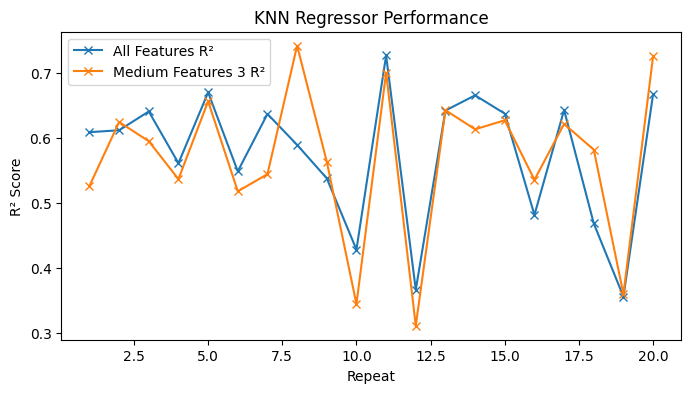

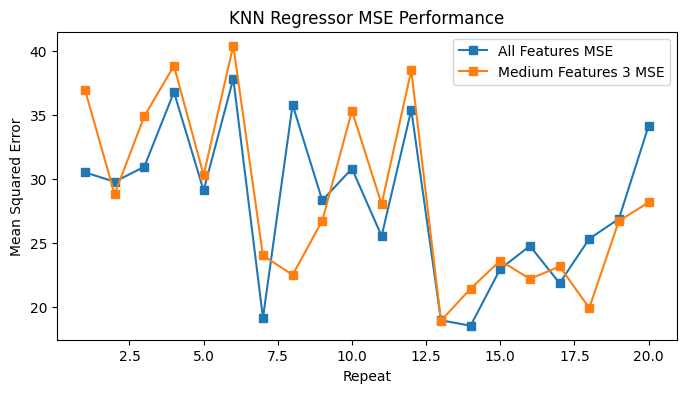

In [22]:

# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, medium_features_3, data_features, test_size=0.1, n_repeats=20)


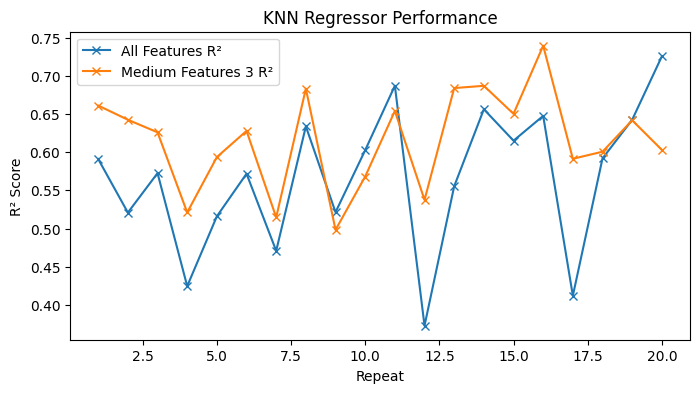

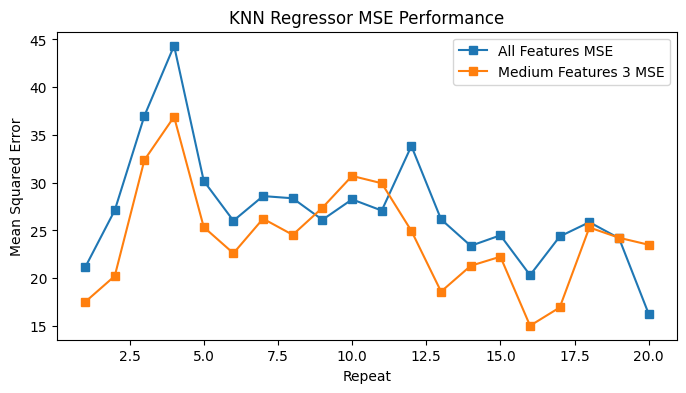

In [23]:

# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data,  medium_features_3, data_features, test_size=0.13, n_repeats=20)


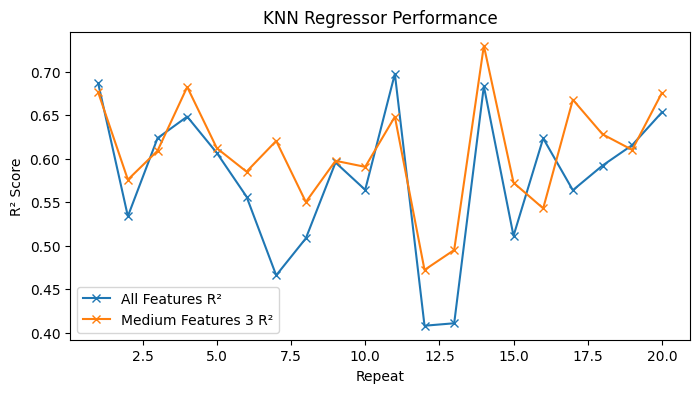

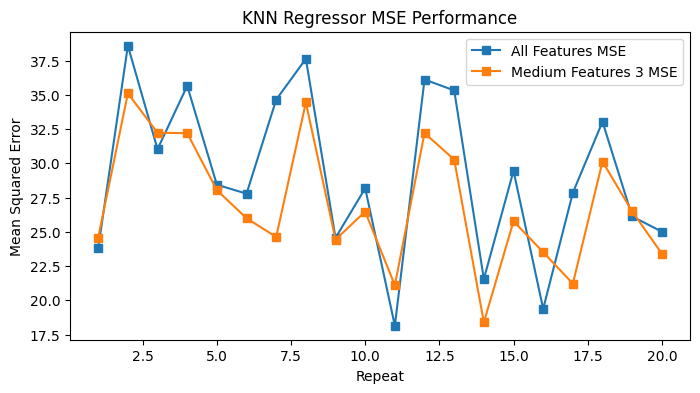

In [24]:

# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, medium_features_3, data_features, test_size=0.16, n_repeats=20)


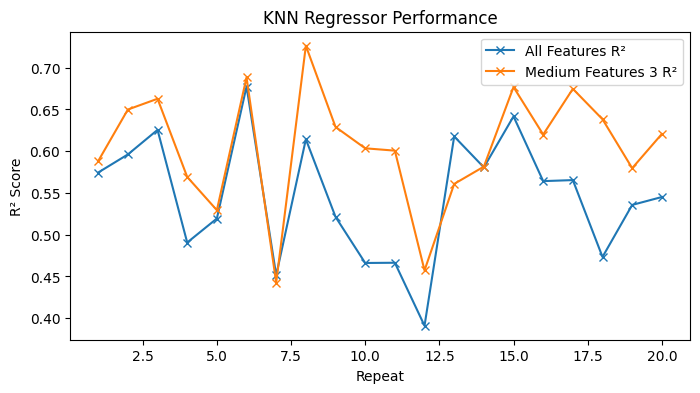

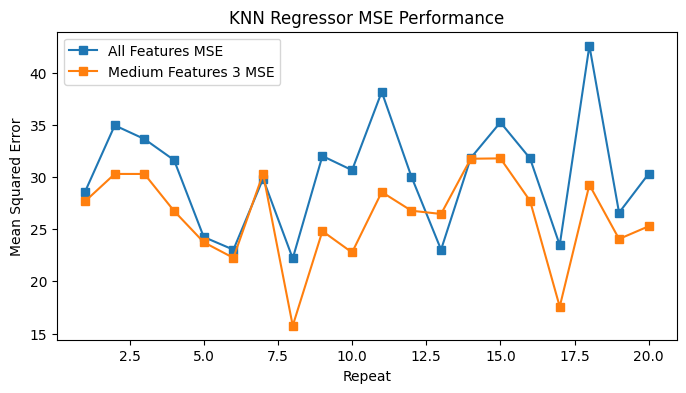

In [25]:

# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, medium_features_3, data_features, test_size=0.19, n_repeats=20)


In [26]:
def knn_evaluation_table(X_data, y_data,  medium_features_3, data_features, test_sizes, n_repeats):
    results = []

    feature_groups = {
        "All": data_features,
        "medium_features_3": medium_features_3
    }

    for test_size in test_sizes:
        for i in range(1, n_repeats + 1):
            X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

            # محاسبه برای همه ویژگی‌ها
            knn_reg_all = KNeighborsRegressor(n_neighbors=5)
            knn_reg_all.fit(X_train[feature_groups["All"]], y_train)
            y_pred_all = knn_reg_all.predict(X_test[feature_groups["All"]])
            mse_all = mean_squared_error(y_test, y_pred_all)
            r2_all = r2_score(y_test, y_pred_all)

            # محاسبه برای ویژگی‌های متوسط
            knn_reg_modified = KNeighborsRegressor(n_neighbors=5)
            knn_reg_modified.fit(X_train[feature_groups["medium_features_3"]], y_train)
            y_pred_modified = knn_reg_modified.predict(X_test[feature_groups["medium_features_3"]])
            mse_modified = mean_squared_error(y_test, y_pred_modified)
            r2_modified = r2_score(y_test, y_pred_modified)

            # ذخیره در لیست
            results.append({
                "Percentage": f"{int(test_size * 100)}%",
                "Repetition": f"n={i}",
                "MSE_All": mse_all,
                "R2_All": r2_all,
                "MSE_Modified": mse_modified,
                "R2_Modified": r2_modified
            })

    # ساخت دیتافریم خروجی
    df_result = pd.DataFrame(results)
    return df_result


# درصدهای تست مختلف
test_sizes = [0.10, 0.13, 0.16, 0.19, 0.25]
n_repeats = 20

# اجرای ارزیابی و دریافت جدول
final_df = knn_evaluation_table(X_data, y_data,  medium_features_3, data_features, test_sizes, n_repeats)

# نمایش جدول
print(final_df)

# (اختیاری) ذخیره جدول در فایل اکسل یا CSV
# final_df.to_csv("knn_results_table.csv", index=False)


   Percentage Repetition    MSE_All    R2_All  MSE_Modified  R2_Modified
0         10%        n=1  41.787088  0.569568     37.075408     0.618101
1         10%        n=2  17.665712  0.568162     20.303824     0.503674
2         10%        n=3  24.486560  0.641635     20.225728     0.703993
3         10%        n=4  20.053312  0.607200     18.067760     0.646093
4         10%        n=5  18.109552  0.552231     17.850304     0.558641
..        ...        ...        ...       ...           ...          ...
95        25%       n=16  35.508914  0.582915     34.436419     0.595512
96        25%       n=17  20.818102  0.654714     21.664324     0.640679
97        25%       n=18  28.157244  0.657672     26.117181     0.682475
98        25%       n=19  34.600902  0.527016     26.934527     0.631813
99        25%       n=20  23.890717  0.532372     20.583010     0.597116

[100 rows x 6 columns]


Index(['Pct.BF', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen',
       'Waist', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Bicep', 'Forearm', 'Wrist'],
      dtype='object')
   Pct.BF  Age  Weight  Height  Neck  Chest  Abdomen      Waist    Hip  Thigh  \
0    12.3   23  154.25   67.75  36.2   93.1     85.2  33.543307   94.5   59.0   
1     6.1   22  173.25   72.25  38.5   93.6     83.0  32.677165   98.7   58.7   
2    25.3   22  154.00   66.25  34.0   95.8     87.9  34.606299   99.2   59.6   
3    10.4   26  184.75   72.25  37.4  101.8     86.4  34.015748  101.2   60.1   
4    28.7   24  184.25   71.25  34.4   97.3    100.0  39.370079  101.9   63.2   

   Knee  Ankle  Bicep  Forearm  Wrist  
0  37.3   21.9   32.0     27.4   17.1  
1  37.3   23.4   30.5     28.9   18.2  
2  38.9   24.0   28.8     25.2   16.6  
3  37.3   22.8   32.4     29.4   18.2  
4  42.2   24.0   32.2     27.7   17.7  
🔎 Feature Group Performance Summary (Boston Housing dataset):
    Feature  R2_Score        MSE
5   A

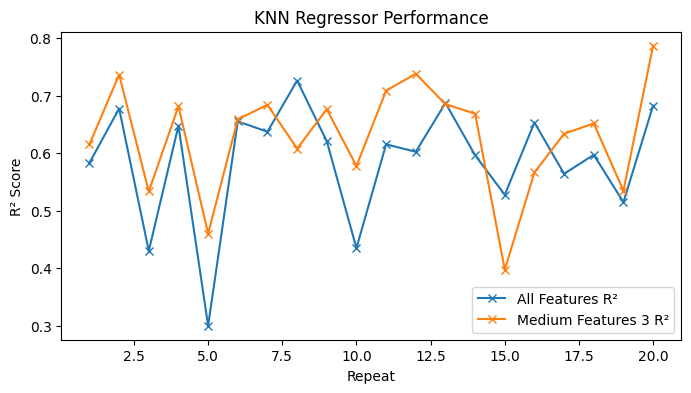

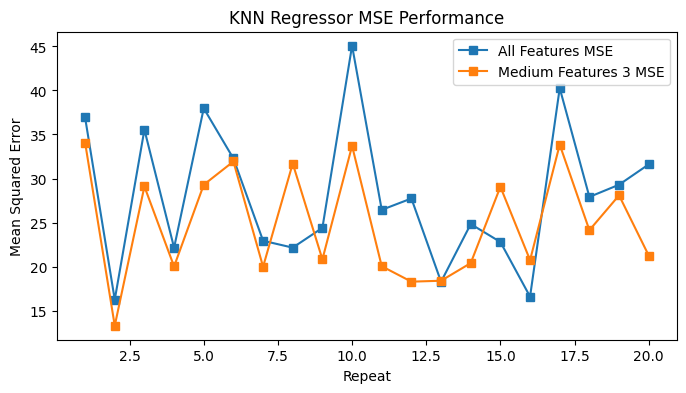

   Percentage Repetition    MSE_All    R2_All  MSE_Modified  R2_Modified
0         10%        n=1  24.721792  0.586368     17.806592     0.702070
1         10%        n=2  24.354816  0.552623     26.591600     0.511535
2         10%        n=3  51.039952  0.557030     46.417936     0.597144
3         10%        n=4  40.621472  0.579087     39.432896     0.591403
4         10%        n=5  36.901488  0.617104     29.318304     0.695789
..        ...        ...        ...       ...           ...          ...
95        25%       n=16  36.600838  0.606373     35.897244     0.613939
96        25%       n=17  40.372483  0.431160     31.069079     0.562243
97        25%       n=18  31.287848  0.590224     30.871911     0.595672
98        25%       n=19  30.334508  0.634485     26.181079     0.684531
99        25%       n=20  31.281010  0.491544     25.052444     0.592786

[100 rows x 6 columns]


In [27]:
#[1]
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import train_test_split


# Function to prioritize features based on KNN R² score
def features_prioritization(X, y, features):
    features_scores = []
    knn_reg = KNeighborsRegressor()

    for feature in features:
        X_feature = X[[feature]]  # Ensure 2D
        knn_reg.fit(X_feature, y)
        y_pred = knn_reg.predict(X_feature)
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        features_scores.append((feature, r2, mse))  # اضافه شد

    df_scores = pd.DataFrame(features_scores, columns=['Feature', 'R2_Score', 'MSE']).sort_values(by='R2_Score', ascending=False)
    return df_scores
# بارگذاری فایل
data = pd.read_csv('bodyfat.csv')

print(data.columns)
# نمایش اطلاعات
print(data.head())
data.shape


# جدا کردن ویژگی‌ها و برچسب‌ها
X_data = data.drop('Pct.BF', axis=1)  # همه ستون‌ها به جز 'target'
y_data = data['Pct.BF']              # فقط ستون 'target'
data_features = X_data.columns       # نام ویژگی‌ها





# Run feature prioritization for the iris dataset
data_scores = features_prioritization(X_data, y_data, data_features)
print("🔎 Feature Group Performance Summary (Boston Housing dataset):")
print(data_scores)  # Categorize features by R² score

# Categorizing features by R² score into multiple levels
strong_features = data_scores[data_scores['R2_Score'] > 0.7]['Feature'].tolist()
medium_features_1 = data_scores[(data_scores['R2_Score'] > 0.5)]['Feature'].tolist()
medium_features_2 = data_scores[(data_scores['R2_Score'] > 0.4)]['Feature'].tolist()
medium_features_3 = data_scores[(data_scores['R2_Score'] > 0.3)]['Feature'].tolist()
medium_features_4 = data_scores[(data_scores['R2_Score'] > 0.17)]['Feature'].tolist()
medium_features_5 = data_scores[(data_scores['R2_Score'] > 0.16)]['Feature'].tolist()
medium_features_6 = data_scores[(data_scores['R2_Score'] > 0.15)]['Feature'].tolist()




#[7]
# Function to safely compute KNN R² score for feature group

def knn_score(X_data, y_data, selected_features):
    if len(selected_features) == 0:  # اصلاح این خط
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X_data[selected_features]
    model.fit(X_subset, y_data)
    return model.score(X_subset, y_data)


# Function to prioritize features based on KNN MSE

def knn_mse(X_data, y_data, selected_features):
    if len(selected_features) == 0:
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X_data[selected_features]
    model.fit(X_subset, y_data)
    y_pred = model.predict(X_subset)
    return mean_squared_error(y_data, y_pred)





# Compute R² and accuracy scores for each group
groups = [data_features, strong_features, medium_features_1, medium_features_2, medium_features_3,
          medium_features_4, medium_features_5, medium_features_6]

r2_scores = [knn_score(X_data, y_data, group) for group in groups]
mse_scores = [knn_mse(X_data, y_data, group) for group in groups]

# Build summary DataFrame
summary_df = pd.DataFrame({
    'Feature_Group': ['All Features', 'Strong Features', 'Medium Features_1 (0.7-0.8)', 'Medium Features_2 (0.6-0.7)',
                      'Medium Features_3 (0.5-0.6)', 'Medium Features_4 (0.4-0.5)', 'Medium Features_5 (0.3-0.4)',
                      'Medium Features_6 (0.2-0.3)'],
    'R2_Score': r2_scores,
    'MSE':mse_scores

})

print("\n📊 Grouped Feature Performance Summary (R² and MSE):")
print(summary_df)



def knn_evaluation(X_data, y_data, medium_features_3, data_features, test_size, n_repeats):
    # Initialize lists to store the results

    mse_scores = {
        "all_features": [],
        "medium_features_3": []
    }


    r2_scores = {
        "all_features": [],
        "medium_features_3": [],
    }

    # List of feature groups to evaluate
    feature_groups = {
        "all_features": data_features,
        "medium_features_3": medium_features_3,
    }

    # Repeat the process n_repeats times with different train-test splits
    for _ in range(n_repeats):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

        for group_name, group_features in feature_groups.items():
            # KNN Regressor
            knn_reg = KNeighborsRegressor(n_neighbors=5)
            knn_reg.fit(X_train[group_features], y_train)
            y_pred_reg = knn_reg.predict(X_test[group_features])
            r2_scores[group_name].append(r2_score(y_test, y_pred_reg))
            mse_scores[group_name].append(mean_squared_error(y_test, y_pred_reg))

    # Plot results for R² and Accuracy
    x = np.arange(1, n_repeats + 1)


    # R² plot
    plt.figure( figsize=(8, 4))
    for group_name, r2_list in r2_scores.items():
        plt.plot(x, r2_list, label=f"{group_name.replace('_', ' ').title()} R²", marker='x')
    plt.xlabel('Repeat')
    plt.ylabel('R² Score')
    plt.title('KNN Regressor Performance')
    plt.legend()
    plt.show()

    # MSE plot
    plt.figure(figsize=(8, 4))
    for group_name, mse_list in mse_scores.items():
        plt.plot(x, mse_list, label=f"{group_name.replace('_', ' ').title()} MSE", marker='s')
    plt.xlabel('Repeat')
    plt.ylabel('Mean Squared Error')
    plt.title('KNN Regressor MSE Performance')
    plt.legend()
    plt.show()


# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data,  medium_features_3, data_features, test_size=0.10, n_repeats=20)



def knn_evaluation_table(X_data, y_data,  medium_features_3, data_features, test_sizes, n_repeats):
    results = []

    feature_groups = {
        "All": data_features,
        "medium_features_3": medium_features_3
    }

    for test_size in test_sizes:
        for i in range(1, n_repeats + 1):
            X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

            # محاسبه برای همه ویژگی‌ها
            knn_reg_all = KNeighborsRegressor(n_neighbors=5)
            knn_reg_all.fit(X_train[feature_groups["All"]], y_train)
            y_pred_all = knn_reg_all.predict(X_test[feature_groups["All"]])
            mse_all = mean_squared_error(y_test, y_pred_all)
            r2_all = r2_score(y_test, y_pred_all)

            # محاسبه برای ویژگی‌های متوسط
            knn_reg_modified = KNeighborsRegressor(n_neighbors=5)
            knn_reg_modified.fit(X_train[feature_groups["medium_features_3"]], y_train)
            y_pred_modified = knn_reg_modified.predict(X_test[feature_groups["medium_features_3"]])
            mse_modified = mean_squared_error(y_test, y_pred_modified)
            r2_modified = r2_score(y_test, y_pred_modified)

            # ذخیره در لیست
            results.append({
                "Percentage": f"{int(test_size * 100)}%",
                "Repetition": f"n={i}",
                "MSE_All": mse_all,
                "R2_All": r2_all,
                "MSE_Modified": mse_modified,
                "R2_Modified": r2_modified
            })

    # ساخت دیتافریم خروجی
    df_result = pd.DataFrame(results)
    return df_result


# درصدهای تست مختلف
test_sizes = [0.10, 0.13, 0.16, 0.19, 0.25]
n_repeats = 20

# اجرای ارزیابی و دریافت جدول
final_df = knn_evaluation_table(X_data, y_data,  medium_features_3, data_features, test_sizes, n_repeats)

# نمایش جدول
print(final_df)

# (اختیاری) ذخیره جدول در فایل اکسل یا CSV
# final_df.to_csv("knn_results_table.csv", index=False)
